In [1]:
# Load The Data
level = [1,2,3,4,5]
reduction = [5,10,15,20,30]
participants = [200,200,200,200,200]
redeemed = [30,55,70,100,137]
proportion = [0 for i in range(len(level))]
for i in range(len(proportion)):
    proportion[i]=redeemed[i]/participants[i]

In [2]:
import matplotlib.pyplot as plt
def make1plot(listx1,listy1,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (6,6)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='o',linewidth=0) # basic data plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.grid(axis='y')
    plt.show()

def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (6,6)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='v',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.grid(which='both',axis='both')
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.grid(axis='y')
    plt.show()

%matplotlib inline

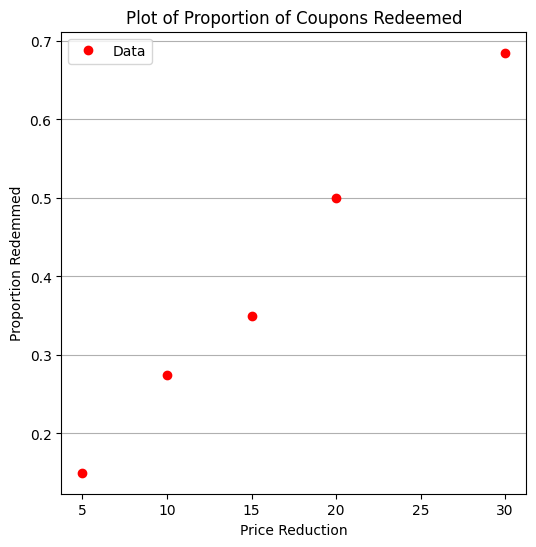

In [3]:
make1plot(reduction,proportion,'Price Reduction','Proportion Redemmed','Plot of Proportion of Coupons Redeemed')

In [4]:
def pii(b0,b1,x): #sigmoidal function
    import math
    pii = math.exp(b0+b1*x)/(1+ math.exp(b0+b1*x))
    return(pii)

def sse(mod,obs): #compute sse from observations and model values
    howmany = len(mod)
    sse=0.0
    for i in range(howmany):
        sse=sse+(mod[i]-obs[i])**2
    return(sse)

def merit(beta): # merit function to minimize
    global proportion,reduction #access lists already defined external to function
    mod=[0 for i in range(len(proportion))]
    for i in range(len(level)):
        mod[i]=pii(beta[0],beta[1],reduction[i])
    merit = sse(mod,proportion)
    return(merit)


In [5]:
beta = [0,0] # initial guess
merit(beta) # test for exceptions

0.22985

Optimization terminated successfully.
         Current function value: 0.002032
         Iterations: 3
         Function evaluations: 81
 b0 =  -2.0165402749739756
 b1 =  0.09580373659184761


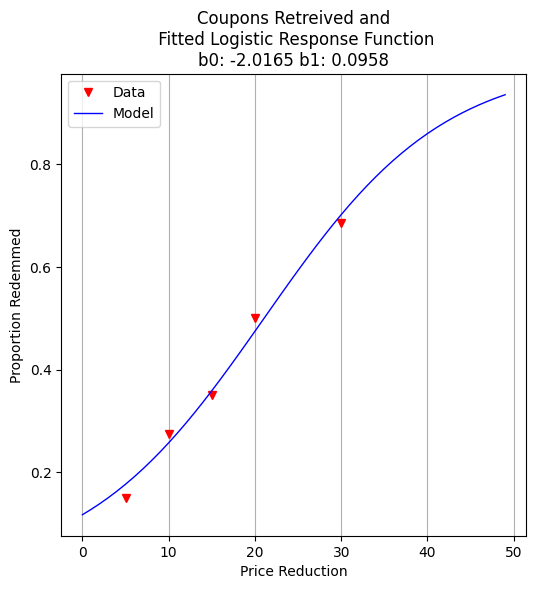

In [6]:
import numpy as np
from scipy.optimize import minimize

x0 = np.array([-2,0.09])
res = minimize(merit, x0, method='powell',options={'disp': True})
# 
fitted=[0 for i in range(50)]
xaxis =[0 for i in range(50)]
for i in range(50):
    xaxis[i]=float(i)
    fitted[i]=pii(res.x[0],res.x[1],float(i))
    
print(" b0 = ",res.x[0])
print(" b1 = ",res.x[1])

plottitle = 'Coupons Retreived and\n Fitted Logistic Response Function\n'+'b0: '+ str(round(res.x[0],4))+ ' b1: ' +str(round(res.x[1],4))
make2plot(reduction,proportion,xaxis,fitted,'Price Reduction','Proportion Redemmed',plottitle)

In [7]:
guess = 21.05
fraction = pii(res.x[0],res.x[1],guess)
print("For Reduction of ",guess," projected redemption rate is ",round(fraction,3))

For Reduction of  21.05  projected redemption rate is  0.5


In [8]:
guess = 61.90
fraction = pii(res.x[0],res.x[1],guess)
print("For Reduction of ",guess," projected redemption rate is ",round(fraction,3))

For Reduction of  61.9  projected redemption rate is  0.98


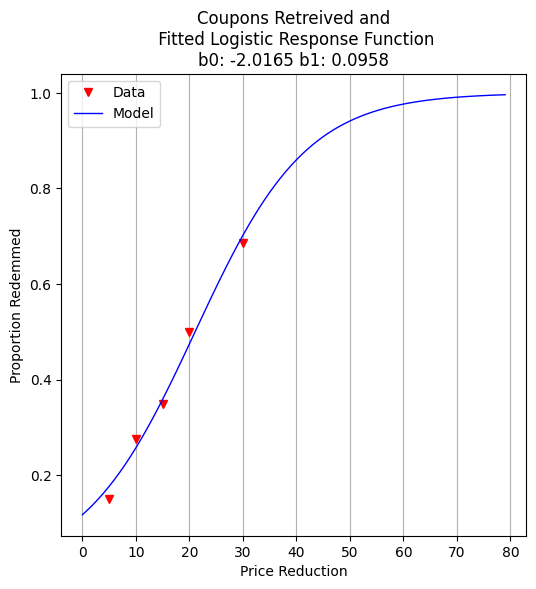

In [9]:
fitted=[0 for i in range(80)]
xaxis =[0 for i in range(80)]
for i in range(80):
    xaxis[i]=float(i)
    fitted[i]=pii(res.x[0],res.x[1],float(i))

plottitle = 'Coupons Retreived and\n Fitted Logistic Response Function\n'+'b0: '+ str(round(res.x[0],4))+ ' b1: ' +str(round(res.x[1],4))
make2plot(reduction,proportion,xaxis,fitted,'Price Reduction','Proportion Redemmed',plottitle)